## Text Vectorization

Question: What is text vectorization?

Answer: The process to transform text data to numerical vectors

## Options for Text Vectorization

- Count the number of unique words for each sentence bag-of-words(BOW)

- Assign weights to each word in the sentences

- Map each word to a number (dictionary with words as key and numbers as values) and represent each sentences as the sequence of numbers 


## Bag-of-Word Matrix

- BoW is a matrix where its rows are sentences and its columns are unique words for the whole documents (corpus)

- We can write down our own function to return BoW matrix based 

- Below, we will seehow we can build BoW by calling sklearn methods

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

sentences = ['This is the first sentence.',
             'This one is the second sentence.',
             'And this is the third one.',
             'Is this the first sentence?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)
print(X.toarray())   
# number of rows = number of sentences 4
# number of columns = number of unique words 9

[[0 1 1 0 0 1 1 0 1]
 [0 0 1 1 1 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 0 1 1 0 1]]


# How do we get unique words?

In [5]:
# Get unique words
print(vectorizer.get_feature_names())

['and', 'first', 'is', 'one', 'second', 'sentence', 'the', 'third', 'this']


In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

worksheet = ["Data Science is the best.",
             "Data Science has cool topics.",
             "Are these the best topics?",
             "Is Data Science the best track?"]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(worksheet)

# X.torray() is BoW
print(X.toarray())

[[0 1 0 1 0 1 1 1 0 0 0]
 [0 0 1 1 1 0 1 0 0 1 0]
 [1 1 0 0 0 0 0 1 1 1 0]
 [0 1 0 1 0 1 1 1 0 0 1]]


In [7]:
print(vectorizer.get_feature_names())

['are', 'best', 'cool', 'data', 'has', 'is', 'science', 'the', 'these', 'topics', 'track']


In [12]:
print(X.shape)

(4, 11)


### Clustering

- clustering is unsupervised learning method. A cluster is a group of data points that are grouped together due to similarities in their features
- this is very often used because we usually don't have labeled data
- K-means clustering is popular clustering algorithms: it fiends a fixed number (k) of clusters in a set of data
- the goal of any cluster algorithm is the find groups (cluters) in the given data

### Examples:
- cluster movie dataset -> we expect the movies which their genres are simliar be clustered in the same group

## K-means algorithm:

Assume the inputs are $s_1$, $s_2$, ..., $s_n$. 

Step 1 - Choose $K$ arbitrarily.

Step 2 - Pick $K$ random points as cluster centers (called centroids)

Step 3 - Assign each $s_i$ to nearest cluster by calculating its distance to each centroid

Step 4 - Find new cluster center by taking the average of the assigned points

Step 5 - Repeat Step 2 and 3 until none of the cluster assignments change

## Lets generate sample dataset

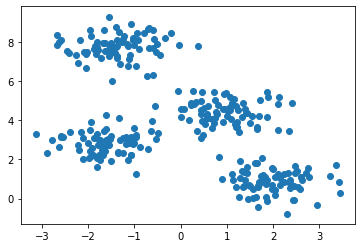

In [15]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

# create a sample dataset with 300 data points and 4 cluster centers
X, y = make_blobs(n_samples=300, centers=4,
                          random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1])

In [18]:
from sklearn.cluster import KMeans

# k-means algorithm where k = 4
km = KMeans(n_clusters=4)

# perfrom k-means clustering on the previous dataset
km.fit(X)

#print the 4 cluster centers
print(km.cluster_centers_)    # the centers are not actual data points from the given dataset

[[ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]]


In [23]:
import numpy as np
from numpy import linalg as LA


a = np.array([1, 1])
b = np.array([2, 2])
c = np.array([3, 8])
print(LA.norm(a - b))   # distance from a to b
print(LA.norm(a - c))   # distance rom a to c
print(LA.norm(b - c))   # distance from b to c

1.4142135623730951
7.280109889280518
6.082762530298219


### How to choose correct number of cluster (K)?

Choose arbitrary K

1- Compute all of the distances of red points to red centroid

2- Do step (1) for other colors (purple, blue, ...)

3- Add them up

## Another implementation for obtaining the appropriate number of cluster 

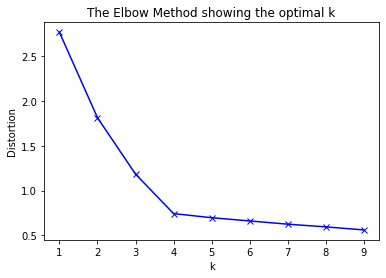

In [31]:
import numpy as np
from scipy.spatial import distance

distortions = []
K = range(1, 10)
for k in K:
    # for the k-means for a given k to the data(X)
    km = KMeans(n_clusters=k)
    km.fit(X)
    # distance.cdist finds the squared distances
    # axis = 1 allows us to keep the min for each sample, not just the min across the entire dataset
    # find the closest distance for each sample to a center, and take the average
    distortions.append(sum(np.min(distance.cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow: bx- = use a solid(-) blue and (b) line,
# and mark the x-axis points with and x (x)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


# the k with the greatest affect on the calculations is 4 because the changes decrease following it 
# 4 is the elbow point

# Inertia

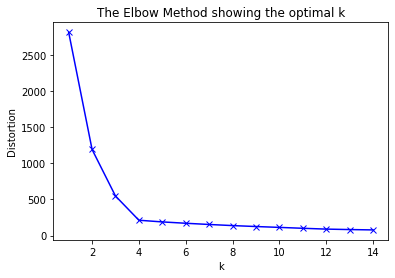

In [24]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    # inertia is an attribute of km
    # 
    sum_of_squared_distances.append(km.inertia_)
    

    # Plot the elbow
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Activity: 
Show that 6 is the optimal K for clustering using k-means using the elbow method. 

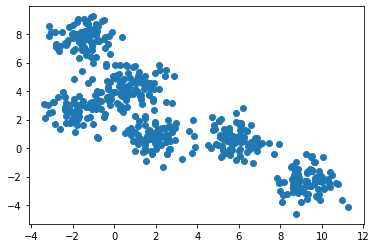

In [34]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

Data, blob_y, = make_blobs(n_samples = 500, centers=6,
                          random_state=0, cluster_std=0.80)

# plot the data
plt.scatter(Data[:, 0], Data[:, 1])

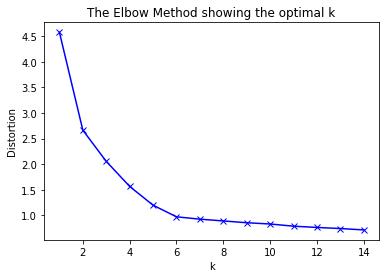

In [39]:
import numpy as np
from scipy.spatial import distance

distortions = []
K = range(1, 15)
for k in K:
    # for the k-means for a given k to the data(X)
    km = KMeans(n_clusters=k)
    km.fit(Data)
    # distance.cdist finds the squared distances
    # axis = 1 allows us to keep the min for each sample, not just the min across the entire dataset
    # find the closest distance for each sample to a center, and take the average
    distortions.append(sum(np.min(distance.cdist(Data, km.cluster_centers_, 'euclidean'), axis=1)) / Data.shape[0])

# Plot the elbow: bx- = use a solid(-) blue and (b) line,
# and mark the x-axis points with and x (x)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

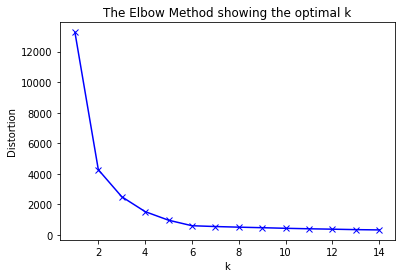

In [36]:
# Inertia

sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(Data)
    # inertia is an attribute of km
    # 
    sum_of_squared_distances.append(km.inertia_)
    

    # Plot the elbow
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# How many samples are in each cluster

In [60]:
from sklearn.cluster import KMeans
from collections import Counter

km = KMeans(n_clusters = 6)

In [61]:
km.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [62]:
Counter(km.predict(Data))

Counter({3: 83, 4: 82, 2: 82, 1: 83, 0: 78, 5: 92})

# Activity: Combine Text Vectorization and Clustering the Texts (30 min)¶

We want to cluster the given sentences

* To do this: We to use both concepts we learned today:

* Vectorize the sentences (text-vectorization)

* Apply Kmeans to cluster our vectorized sentences

* Note: We want to remove stop words from our sentences (and, or, is, etc.). To do this, we add stop_words='english' to our call to CountVectorize

* Hint: Look at the sentences in the starter code. How would you cluster the data if you were doing the clustering? Use that number as your K to start with.

In [87]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

# remove stop words form sentences (and, or, is...) and instantiate the bag-of-words
vectorizer = CountVectorizer(stop_words = 'english')

# transform sentences into numerical arrays
bag_of_words = vectorizer.fit_transform(documents)

# print the unique words
print(vectorizer.get_feature_names())

# we know that there are two groups of sentences --> Group 1: cats, Group 2: Google
# true_k = 2

km = KMeans(n_clusters=2).fit(bag_of_words)

km.labels_

# print(vectorizer.get_feature_names())
# print(bag_of_words.shape)

['100', 'app', 'belly', 'best', 'came', 'cat', 'chrome', 'climbing', 'eating', 'extension', 'face', 'feedback', 'google', 'impressed', 'incredible', 'key', 'kitten', 'kitty', 'little', 'map', 'merley', 'ninja', 'open', 'photo', 'play', 'promoter', 'restaurant', 'smiley', 'squooshy', 'tab', 'taken', 'translate', 've']


array([0, 1, 0, 0, 1, 1, 0, 0], dtype=int32)

In [88]:
km.predict(bag_of_words)

array([0, 1, 0, 0, 1, 1, 0, 0], dtype=int32)

In [89]:
# Testing our model: for a new sentence, let's see how the model will cluster it:

sentence = ["My cat is hungry"]
v1 = vectorizer.transform(sentence)
print(v1)

  (0, 5)	1


In [90]:
v1.toarray()     # compared to km.labels_ , the word cat is found in position 6 which is represented by 1

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [91]:
km.predict(v1)     # array[1] is for cats so it is put in the correct group

array([1], dtype=int32)

In [93]:
# Testing our model: for a new sentence, let's see how the model will cluster it:
Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)


[0]


In [94]:
# instructors solution

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

# vectorizer = TfidfVectorizer(stop_words='english')
vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(sentences)
print(vectorizer.get_feature_names())
print(X.shape)
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++')
model.fit(X)
# print('M:')
# print(model.cluster_centers_.argsort())
# print(model.cluster_centers_.argsort()[:, ::-1])
# print("Top terms per cluster:")
# order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()
# for i in range(true_k):
#     print("Cluster %d:" % i),
#     for ind in order_centroids[i, :10]:
#         print(' %s' % terms[ind]),


# print("\n")
# print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
print('Y:')
print(Y.toarray())
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)
# Lets see the model prediction for training docs
print(model.predict(X))

['100', 'app', 'belly', 'best', 'came', 'cat', 'chrome', 'climbing', 'eating', 'extension', 'face', 'feedback', 'google', 'impressed', 'incredible', 'key', 'kitten', 'kitty', 'little', 'map', 'merley', 'ninja', 'open', 'photo', 'play', 'promoter', 'restaurant', 'smiley', 'squooshy', 'tab', 'taken', 'translate', 've']
(8, 33)
Y:
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]
[0]
[1]
[1 1 0 0 1 1 0 0]
